<a href="https://colab.research.google.com/github/kaushalya06/Lung-Cancer-detection-using-Transfer-Learning/blob/main/getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a id='getting-started'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

LUNG CANCER


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kaushalyar","key":"ad34b61ea25c23d40e4f039c7c104d19"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images
License(s): CC-BY-SA-4.0
 98% 1.72G/1.76G [00:19<00:00, 52.6MB/s]
100% 1.76G/1.76G [00:19<00:00, 96.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/lung-and-colon-cancer-histopathological-images.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
DATADIR = '/content/LungCancer'
CATEGORIES = ['lung_adenocarcinomas', 'lung_normal', 'lung_squamous_cell_carcinomas']

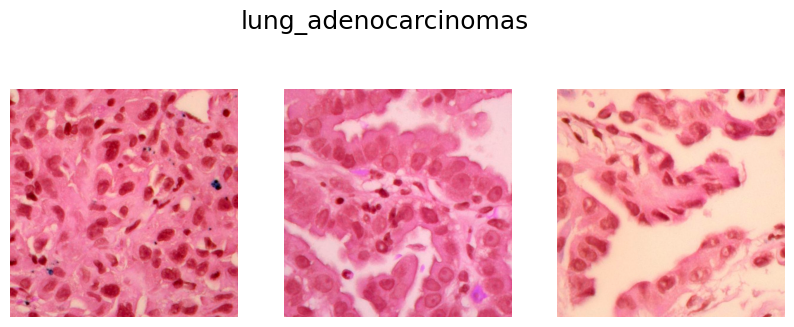

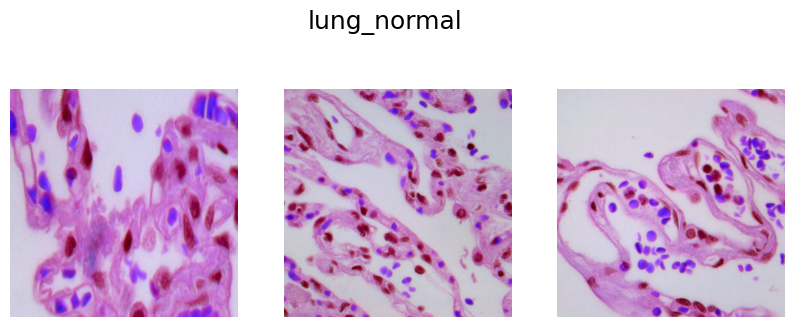

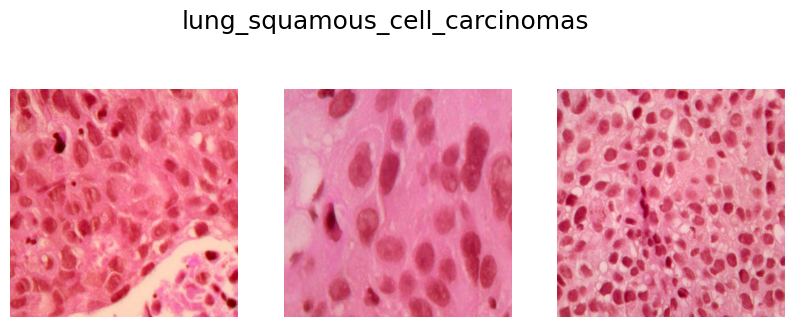

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Displaying the images
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    images = os.listdir(path)

    # Initialize a subplot with 1 row and 3 columns
    fig, ax = plt.subplots(1, 3, figsize=(10, 4))
    fig.suptitle(f'{category}', fontsize=18)

    for i in range(3):
        # Randomly select an image
        img_name = images[np.random.randint(0, len(images))]
        img_path = os.path.join(path, img_name)
        img_array = cv2.imread(img_path)

        # Display the image
        ax[i].imshow(img_array)
        ax[i].axis('off')


In [ ]:
img_array.shape

(768, 768, 3)

In [ ]:
IMG_SIZE = 224

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

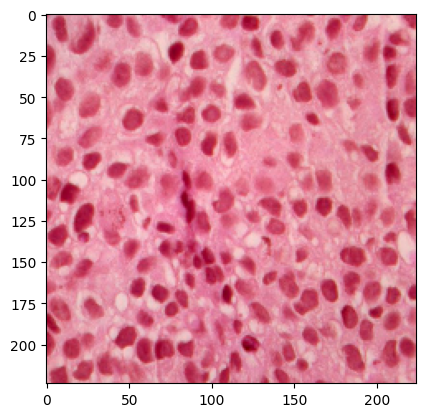

In [ ]:
plt.imshow(new_array)

In [ ]:
new_array.shape

(224, 224, 3)

In [ ]:
training_data = []

def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e:
        pass

create_training_data()

In [ ]:
len(training_data)

15000

In [ ]:
15000
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [ ]:
type(X),type(y)

(list, list)

In [ ]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)    # last value '3' for 'RGB'
y = np.array(y)

In [ ]:
type(X),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f'X_train Length : {X_train.shape[0]}, X_train Image size : {X_train.shape[1:3]}, Channel Dimension : {X_train.shape[3]}')
print(f'X_test Length : {X_test.shape[0]}, X_test Image size : {X_test.shape[1:3]}, Channel Dimension : {X_test.shape[3]}')

X_train Length : 12000, X_train Image size : (224, 224), Channel Dimension : 3
X_test Length : 3000, X_test Image size : (224, 224), Channel Dimension : 3


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.applications import vgg16

In [ ]:
vgg = vgg16.VGG16(weights = 'imagenet', include_top = False, input_shape = (IMG_SIZE, IMG_SIZE, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# freezing the bottom (conv) layers
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
# building the top (FC) layers
model = keras.Sequential([
    vgg,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax'),
])

In [ ]:
#compilation
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 72s 154ms/step - accuracy: 0.8927 - loss: 0.6000
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 73s 164ms/step - accuracy: 0.9733 - loss: 0.0665
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.9766 - loss: 0.0582
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.9838 - loss: 0.0419
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 165ms/step - accuracy: 0.9930 - loss: 0.0218


In [ ]:
# evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy : {accuracy * 100}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 26s 274ms/step - accuracy: 0.9563 - loss: 0.1207
Model Accuracy : 95.89999914169312


In [ ]:
model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 172ms/step


array([[1.4408176e-09, 8.7510540e-15, 1.0000000e+00],
       [4.1655798e-18, 1.0000000e+00, 7.9715114e-23],
       [1.5152153e-08, 9.4763693e-13, 1.0000000e+00],
       ...,
       [1.0940712e-13, 1.6371798e-19, 1.0000000e+00],
       [6.4184698e-09, 1.9655045e-11, 1.0000000e+00],
       [1.2901674e-08, 1.8438708e-13, 1.0000000e+00]], dtype=float32)

In [ ]:
pred = np.argmax(model.predict(X_test), axis = -1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 161ms/step


In [ ]:
pred

array([2, 1, 2, ..., 2, 2, 2])

In [ ]:
y_test[:5]

array([2, 1, 2, 0, 1])

In [ ]:
pred[:5]

array([2, 1, 2, 0, 1])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

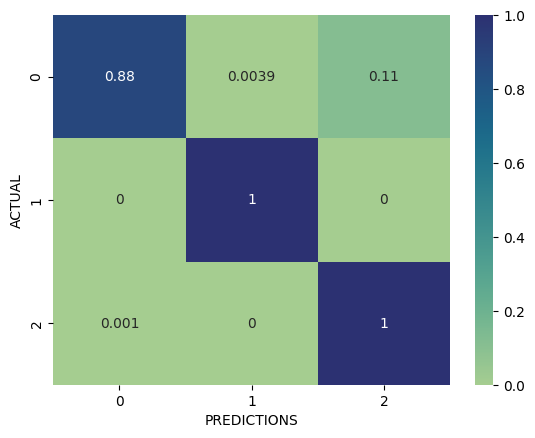

In [ ]:
#confusion matrix
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest');
plt.xlabel('PREDICTIONS');
plt.ylabel('ACTUAL');

In [ ]:
model.save('lung_cancer_model.keras')

